# Conditional object generation using pre-trained models and plug-in-networks
Prowadzący: **Patryk Wielopolski**, Politechnika Wrocławska
Streszczenie:

Generative models have gained many Machine Learning practitioners’ attention in the last years resulting in models such as StyleGAN for human face generation or PointFlow for the 3D point cloud generation. However, by default, we cannot control its sampling process, i.e., we cannot generate a sample with a specific set of attributes. The current approach is model retraining with additional inputs and different architecture, which requires time and computational resources.

During this hands-on workshop we will go through a method which enables to generate objects with a given set of attributes without retraining the base model. For this purpose, we will utilize the normalizing flow models - Conditional Masked Autoregressive Flow and Conditional Real NVP, and plug-in networks resulting in the Flow Plugin Network.


Cel warsztatów:
 * Praktyczne zapoznanie się z modelami Normalizing Flows oraz biblioteką nflows
 * Praktyczne zapoznanie się z metodą Flow Plugin Network

Agenda:
 * Wstęp do modeli generatywnych
 * Praktyczny wstęp do Normalizing Flows z wykorzystaniem pakietu **nflows**.
 * Metoda Flow Plugin Network (FPN)
 * Wykorzystanie metody FPN do warunkowego generowania obrazów
 * Wykorzystanie metody FPN do warunkowego generowania chmur punktów

## Wstęp do modeli generatywnych

Poopowiadać o GANach, VAE, NFs - porównanie
Poopowiadać od strony teoretycznej o flowach


## Praktyczny wstęp do Normalizing Flows z wykorzystaniem pakietu **nflows**.

Omówienie metod:
  * NICE
  * RealNVP
  * MAF

Omówienie warunkowania modeli:
  * Conditional NICE
  * Conditional RealNVP
  * Conditional MAF

### Konstrukcja biblioteki nflows

Krótkie omówienie biblioteki

  * Distributions
  * Flows
  * Nn
  * Transforms
  * Utils

### Toy example data

In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import torch
from torch import nn
from torch import optim

from nflows.flows.realnvp import SimpleRealNVP

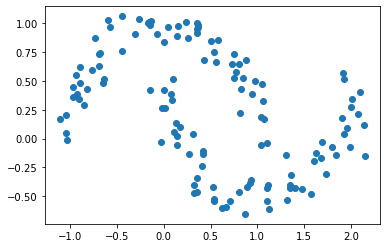

In [2]:
x, y = datasets.make_moons(128, noise=.1)
plt.scatter(x[:, 0], x[:, 1]);

### NICE (Non-linear Independent Component Estimation)

The NICE (Non-linear Independent Component Estimation; Dinh, et al. 2015) model is a predecessor of RealNVP. The transformation in NICE is the affine coupling layer without the scale term, known as additive coupling layer.

$$
\begin{cases}
    \mathbf{y}_{1:d} &= \mathbf{x}_{1:d} \\
    \mathbf{y}_{d+1:D} &= \mathbf{x}_{d+1:D} + m(\mathbf{x}_{1:d})
    \end{cases}
    \Leftrightarrow
    \begin{cases}
    \mathbf{x}_{1:d} &= \mathbf{y}_{1:d} \\
    \mathbf{x}_{d+1:D} &= \mathbf{y}_{d+1:D} - m(\mathbf{y}_{1:d})
\end{cases}
$$

In [3]:
flow = SimpleRealNVP(features = 2, hidden_features = 4, use_volume_preserving = True)
optimizer = optim.Adam(flow.parameters())

<ipython-input-4-11dc19d95c0f>:11: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /tmp/pip-req-build-mb0j4ret/aten/src/ATen/native/RangeFactories.cpp:23.)
  xline = torch.linspace(-1.5, 2.5)


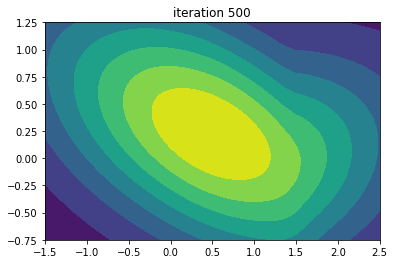

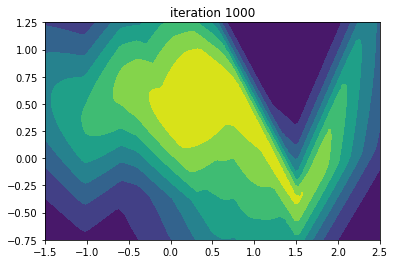

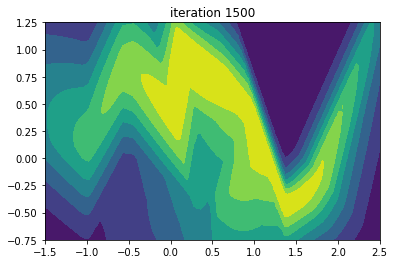

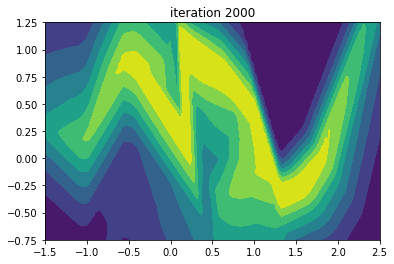

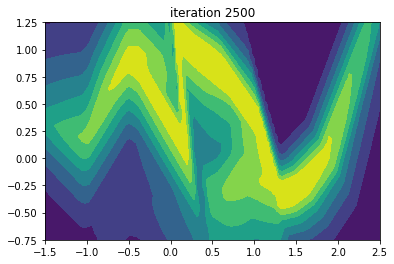

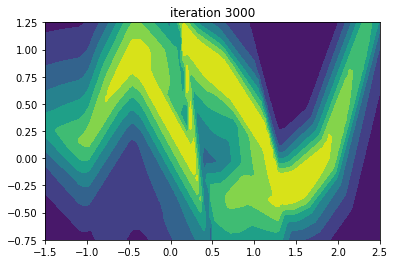

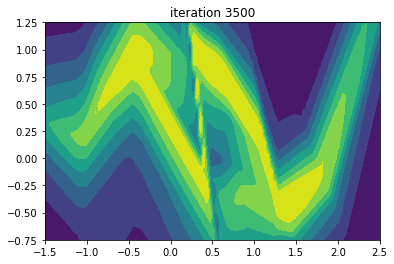

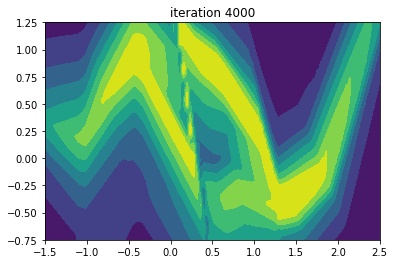

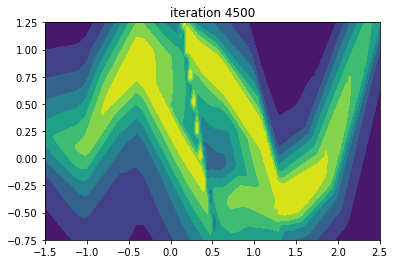

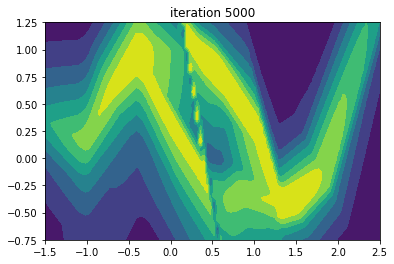

In [4]:
num_iter = 5000
for i in range(num_iter):
    x, y = datasets.make_moons(128, noise=.1)
    x = torch.tensor(x, dtype=torch.float32)
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x).mean()
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 500 == 0:
        xline = torch.linspace(-1.5, 2.5)
        yline = torch.linspace(-.75, 1.25)
        xgrid, ygrid = torch.meshgrid(xline, yline)
        xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        with torch.no_grad():
            zgrid = flow.log_prob(xyinput).exp().reshape(100, 100)

        plt.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy())
        plt.title('iteration {}'.format(i + 1))
        plt.show()

### RealNVP


### Masked Autoregressive Flow (MAF)

### Conditional NICE

### Conditional RealNVP

### Conditional Masked Autoregressive Flow (MAF)

## Metoda Flow Plugin Network (FPN)

### Koncepcja Plugin Network

## Wykorzystanie metody FPN do warunkowego generowania obrazów

* Kod do wytrenowania prostego VAE
* Wygenerowanie losowych obiektów
* Kod do wytrenowania prostego FPNa
* Wygenerowanie pożądanych obiektów

### Inne metody

  * PluGeN
  * StyleFlow

#TODO: Dodać po obrazku z przykładem i krótki opis

## Wykorzystanie metody FPN do warunkowego generowania chmur punktów

 * Zadanie: Wytrenować na podstawie powyższego kodu model do generowania chmur punktów
 * TODO: Dostarczyć PointFlowa (?)

## Bibliografia

[Normalizing Flows]()
[Flow based deep generative models](https://lilianweng.github.io/lil-log/2018/10/13/flow-based-deep-generative-models.html#nice)
[NICE]()
[RealNVP]()
[MAF]()
[Flow Plugin Network]()
